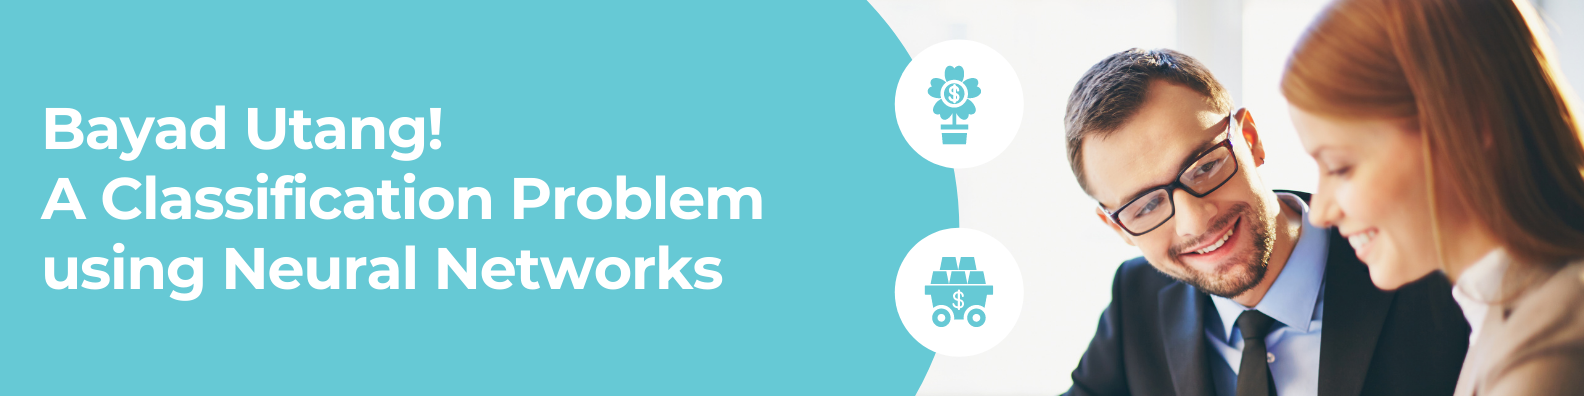

# Background

In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load warnings (to remove warnings)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# load timer
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

# load sound player
from IPython.lib.display import Audio
# sound_file = '/home/msds2022/kcamacho/run_chime.mp3'
# sound_file = '/Users/kash/Downloads/run_chime.mp3'

# Audio(sound_file, rate   = 4410, autoplay=True)


time: 1.02 ms (started: 2021-11-18 13:07:02 +00:00)


In [2]:
pip install eli5

time: 3.36 s (started: 2021-11-18 13:07:03 +00:00)


In [3]:
import eli5
from eli5.sklearn import PermutationImportance

time: 3.42 s (started: 2021-11-18 13:07:06 +00:00)


## Dataset and overview

We will be using the data set on the LendingClub in Kaggle. LendingClub is a US-based peer-to-peer lending company that is headquarted in San Francisco, California. It offers personal loans, business loans, auto refinancing and patient solutions, and also offers high yield savings accounts. During the time of the publication of the dataset, they offered Notes in the secondary market but have already replaced this with an exclusive high yield savings account for their founding members as of Nov 2021. (Source: https://www.lendingclub.com/investing/peer-to-peer). The dataset used is a subset of the dataset in Kaggle. The dataset can be found here https://www.kaggle.com/wordsforthewise/lending-club.

The following table shows the information on the dataset. The `Loan Status` is the target variable in this study.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Problem Statement

Given the profile of previous borrowers who paid back and defaulted on their loan, **can we predict whether a new borrower will pay back the loan?** The business value of this is defaults are costly for the customers (since this is a peer-to-peer lending business model) and the company. 

What are the factors or features that affect the borrower's ability to repay the loan? For example, are there are features that explain why the customer is likely to default? If that feature can be changed (or is within the control of the customer), can they be granted a loan?

## Highlights

This study explored how to handle imbalanced datasets using SMOTE (best performing resampler) and MLPClassifier (highest precision) for neural networks. The business value of using precision as the metric was initially explored but F1 scores were also evaluated. MLPClassifier has limitations (only 3 choices of activation function) and we can look at numpy implementation for more flexibility. A keras implementation was also explored as an extra in this study.

## Methodology

This study employed the following methodology:

**1. Exploratory Data Analysis**

EDA was performed to glean insights from the data. This also informed us of possible feature engineering and data that may cause data leakage, and also those that give redundant information.

**2. Data Preprocessing**

Null values were handled, as well as imputation of missing data. Categorical variables were also encoded.

**3. Scaling, Train-Test Split**

Data was scaled using MinMaxScaler and was split between trainval and test split. 

**4. Model Formulation**

A base autoML (no tuning) was run as a baseline. Since the MLPClassifier was of interest, this was tuned using RandomSearchCV. The imbalanced nature of the dataset was also handled by looking at undersampling and resampling techniques. Note that the **Results and Discussions** follow each model/each methodology

**5. Explaining the Model Results**

Permutation Importance was explored as the explainability method for MLPClassifier.

**6. Bonus: Keras Implementation**
A keras implementation was also explored.

# Exploratory Data Analysis

EDA was performed to be able to glean insights from the data.

In [4]:
import eli5
from eli5.sklearn import PermutationImportance

time: 1.29 ms (started: 2021-11-18 13:07:09 +00:00)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 4 ms (started: 2021-11-18 13:07:09 +00:00)


In [6]:
df = pd.read_csv('/content/drive/MyDrive/ML2 Indiv Project/lc_data.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


time: 3.05 s (started: 2021-11-18 13:07:09 +00:00)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


time: 263 ms (started: 2021-11-18 13:07:13 +00:00)


In [9]:
# check if there are null values, we will deal with this later
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

time: 299 ms (started: 2021-11-18 13:07:13 +00:00)


There are a lot of null values in this dataset, and this has to be cleaned later on.

In [10]:
df.shape

(396030, 27)

time: 5.49 ms (started: 2021-11-18 13:07:13 +00:00)


This dataset is composed of `396,030 customers and 26 features`. Feature engineering and data cleaning will be done to get to the final number of features and rows. 

In [11]:
# make a helper function so i can easily read back the details of the column

data_table = pd.read_csv('/content/drive/MyDrive/ML2 Indiv Project/lending_club_info.csv',index_col='LoanStatNew')
data_table['Description']['loan_amnt']

def readfeat(colname):
    print(data_table['Description'][colname])

time: 15.2 ms (started: 2021-11-18 13:07:13 +00:00)


In [12]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

time: 5.08 ms (started: 2021-11-18 13:07:13 +00:00)


In [13]:
readfeat('initial_list_status')

The initial listing status of the loan. Possible values are – W, F
time: 3.59 ms (started: 2021-11-18 13:07:13 +00:00)


## PCC

The following countplot shows us that we are dealing with an imbalanced data set. We will proceed first without dealing with the imbalance and then look at any improvement of the models. Since we are dealing with a very large dataset, we will only test Random Forest and GBM and see how they perform compared to a plain vanilla neural network.

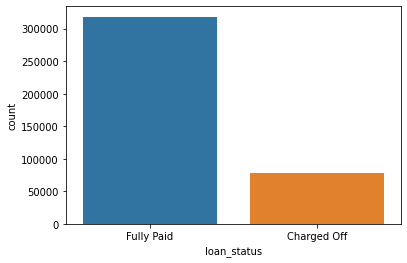

time: 425 ms (started: 2021-11-18 13:07:13 +00:00)


In [14]:
sns.countplot(df['loan_status'])

Percentage per class: 
 Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64 

PCC: 0.6846750706695319
1.25*PCC: 0.8558438383369149


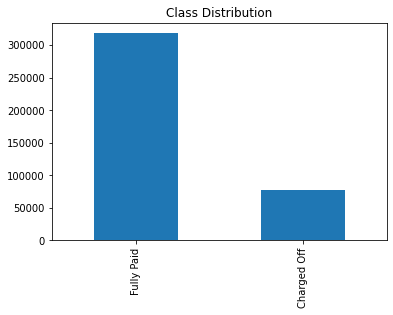

time: 325 ms (started: 2021-11-18 13:07:14 +00:00)


In [15]:
#lets compute PCC to get the baseline accuracy

df['loan_status'].value_counts().plot(kind='bar')
plt.title('Class Distribution')

# compute the PCC
perc = df['loan_status'].value_counts()/df.shape[0]

# you can also compute percentage using normalize=True!
perc = df['loan_status'].value_counts(normalize=True)

PCC = (perc**2).sum()
print('Percentage per class:', '\n', perc, '\n')
print('PCC:', PCC)
print('1.25*PCC:', 1.25*PCC)

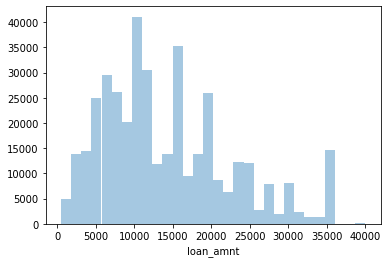

time: 314 ms (started: 2021-11-18 13:07:14 +00:00)


In [16]:
# Let's also inspect the histogram of the loan amounts to see how much they have been lending

sns.distplot(df['loan_amnt'], kde=False, bins=30)

Playing around with the number of bins shows that there are some spikes in even number/ good round number loans such as 10K, 15K, 20K and 35K. These may be their most popular lending amount or there may be promos or specific needs that go with these loan amounts (eg for personal loan it might be at the lower amount like 5K to 10K, but for autoloans or home loans this can be a higher amount).

This information can be used by their marketing for analyzing their most popular products and then create promotions around this. Other factors such as interest rate and credit profile for each of these bins may be futher analysed when coming up with the promos.

In [17]:
corr = df.corr()
corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


time: 241 ms (started: 2021-11-18 13:07:15 +00:00)


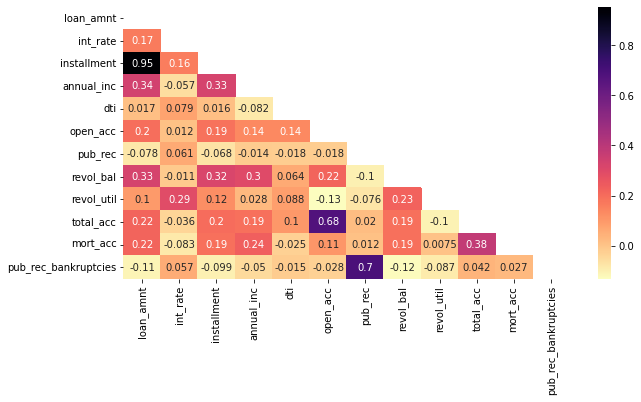

time: 936 ms (started: 2021-11-18 13:07:15 +00:00)


In [18]:
# let's visualize the heatmap and remove the upper triangle to be more neat
plt.figure(figsize=(10,5))
matrix = np.triu(corr)
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='magma_r')
# plt.ylim(10,0);

# code from https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

We can see that `installment` has a high correlation with the target variable. This can be a potential flag - if this is leaking data or a potential data leak? Hence, further exploration of the descriptions of the target and the installment variables are warranted.

In [19]:
readfeat('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
time: 7.26 ms (started: 2021-11-18 13:07:16 +00:00)


In [20]:
readfeat('installment')

The monthly payment owed by the borrower if the loan originates.
time: 3.1 ms (started: 2021-11-18 13:07:16 +00:00)


From our knowledge in Financial Management, the installment amount is computed off the loan amount so it is natural that this has a high correlation. We can also see this relationship in the scatterplot below. installment increases as the loan amount increases.

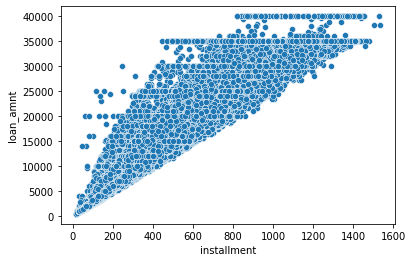

time: 1.72 s (started: 2021-11-18 13:07:16 +00:00)


In [21]:
sns.scatterplot(x='installment', y='loan_amnt', data=df);

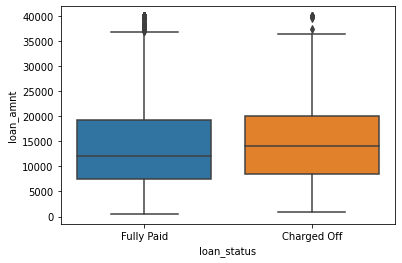

time: 389 ms (started: 2021-11-18 13:07:18 +00:00)


In [22]:
# do higher loan amounts have higher charge off rates? (is it harder to repay higher amt of loans?)

sns.boxplot(x='loan_status', y='loan_amnt', data=df)

We also inspect if higher loan amounts lead to higher charge off rates. The charged off box plot is slightly higher but the boxplot is not too conclusive yet. The average loan amount of charged off loans is around USD 15,000 and fuly paid loans is around USD 13,000.

In [23]:
df.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    15126.300967
Fully Paid     13866.878771
Name: loan_amnt, dtype: float64

time: 44.9 ms (started: 2021-11-18 13:07:18 +00:00)


In [24]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


time: 89.7 ms (started: 2021-11-18 13:07:18 +00:00)


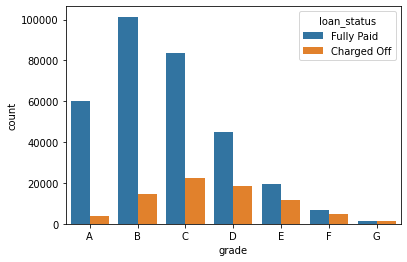

time: 629 ms (started: 2021-11-18 13:07:18 +00:00)


In [25]:
sg_ord = sorted(df['sub_grade'].unique())
g_ord = sorted(df['grade'].unique())
sns.countplot(x='grade', data=df, hue='loan_status', order=g_ord);

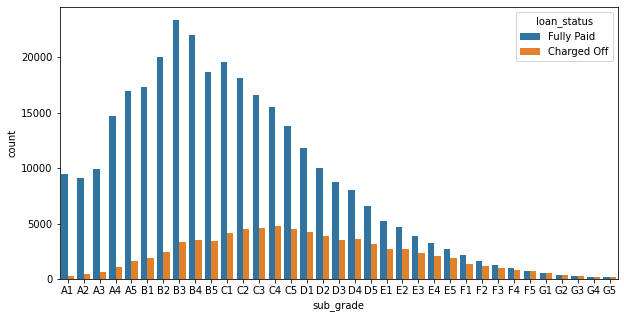

time: 896 ms (started: 2021-11-18 13:07:19 +00:00)


In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sg_ord);

We also inspect the credit rating grade of the borrowers that defaulted and that fully paid. It seems that at the C5 subgrade the number of defaulting customers peaked. and as the subgrade decreased there is almost equal fully paid and charged off loans. To note, the higher the letter (eg F>A) the worse the credit rating. A lower credit rating means that there is a higher probability of default, and the bankers have to be compensated for taking no this risk by increasing the interest rate for these borrowers. However, this mechanism can also cause a vicious cycle in an economic depression (eg higher interest rates, higher loan payments, customers cannot pay, the customers default and banks do not get their money back to service the other borrowers). 

In [27]:
readfeat('sub_grade')

LC assigned loan subgrade
time: 1.76 ms (started: 2021-11-18 13:07:20 +00:00)


In [28]:
readfeat('grade')

LC assigned loan grade
time: 2.3 ms (started: 2021-11-18 13:07:20 +00:00)


In [29]:
# 1: repaid, 0: default
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


time: 103 ms (started: 2021-11-18 13:07:20 +00:00)


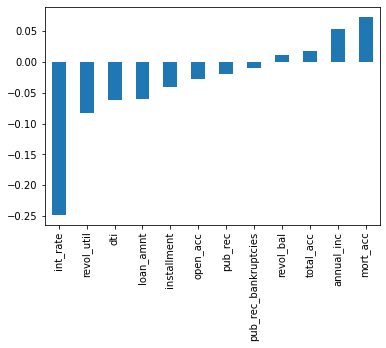

time: 400 ms (started: 2021-11-18 13:07:20 +00:00)


In [30]:
repaid = df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

This correlation shows that the higher the interest rate, it is harder to repay the loan (i.e. higher interest payments or higher ammortization).

# Data Preprocessing
In this section we handle null values, convert categorical variables and further inspect the data if we can extract more features or if we can drop some redundant features.

## Handle null values

In [31]:
len(df)

396030

time: 5.11 ms (started: 2021-11-18 13:07:20 +00:00)


In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

time: 303 ms (started: 2021-11-18 13:07:20 +00:00)


In [33]:
# percentage of the dataframe with missing values
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

time: 275 ms (started: 2021-11-18 13:07:21 +00:00)


It may be noted that the vairables `emp_title` consists of 5.7% of the data, `mort_acc` is 9.54%, `emp_length` is 4.6%. These variables have to be scrutinized carefully if they can be imputed or if they can be safely dropped because they consist a considerable percentage of our dataset.

In [34]:
#let's check the details of those with missing data

readfeat('emp_title')

The job title supplied by the Borrower when applying for the loan.*
time: 1.56 ms (started: 2021-11-18 13:07:21 +00:00)


In [35]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
BB&T HUFFAKER TRIMBLE INSURANCE           1
Director, Business Dev and Training       1
Wells Fargo Investments                   1
Cryptologic Linguist/Sergeant             1
Adult Protection Community Worker         1
Name: emp_title, Length: 173105, dtype: int64

time: 259 ms (started: 2021-11-18 13:07:21 +00:00)


There are a lot of employee titles and we cant know/map which are high paying job titles without a domain expert. Or there may be other variables that can explain this better. This may be explained by the income variable. Hence we can drop this variable.

In [36]:
df = df.drop('emp_title', axis=1)

time: 105 ms (started: 2021-11-18 13:07:21 +00:00)


In [37]:
readfeat('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
time: 2.72 ms (started: 2021-11-18 13:07:21 +00:00)


In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

time: 56.7 ms (started: 2021-11-18 13:07:21 +00:00)


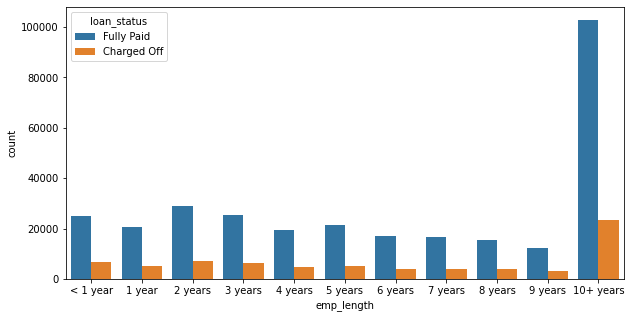

time: 827 ms (started: 2021-11-18 13:07:21 +00:00)


In [39]:
emp_length_ord = [
    '< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=df, order=emp_length_ord, hue='loan_status')

In [40]:
# look at the ratio between those charged off and those fully paid per employment length
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
ratio = emp_co/emp_fp
ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

time: 710 ms (started: 2021-11-18 13:07:22 +00:00)


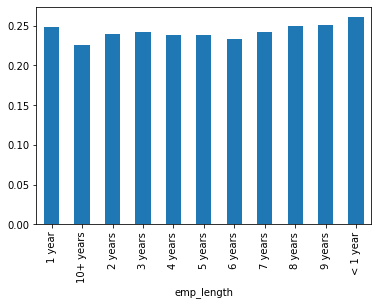

time: 210 ms (started: 2021-11-18 13:07:23 +00:00)


In [41]:
ratio.plot(kind='bar')

The ratio is almost the same, so this looks like there is no differntiation here between the number of people who default based on number of years employeed. Although we know we should not eyeball, an extension of this study is to perform statistical tests (hypothesis tests ala ACS) to be able to make more accurate statistical statements. So we can now also drop the employee length.

In [42]:
df = df.drop('emp_length', axis=1)

time: 67.8 ms (started: 2021-11-18 13:07:23 +00:00)


In [43]:
readfeat('mort_acc')

Number of mortgage accounts.
time: 1.8 ms (started: 2021-11-18 13:07:23 +00:00)


In [44]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

time: 22.4 ms (started: 2021-11-18 13:07:23 +00:00)


The `mort_acc` variable is almost 10% of our data so it may not be prudent to drop this variable. Hence, we inspect the other features that have the highest correlation with the mort_acc column. The correlation below shows its highest correlation is the `total_acc` column so we can use this as basis in filling in the missing values.

In [45]:
df.corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

time: 212 ms (started: 2021-11-18 13:07:23 +00:00)


In [46]:
# use the total account to fill the missing values.
tot_acc_avg = df.groupby('total_acc').mean()['mort_acc']
tot_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

time: 98.1 ms (started: 2021-11-18 13:07:23 +00:00)


In [47]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg[2.0]

0.0

time: 93.8 ms (started: 2021-11-18 13:07:24 +00:00)


In [48]:
def filler(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: filler(x['total_acc'],x['mort_acc']), axis=1)

time: 6.86 s (started: 2021-11-18 13:07:24 +00:00)


In [49]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
loan_repaid                0
dtype: int64

time: 243 ms (started: 2021-11-18 13:07:31 +00:00)


The `title`, `revol_util` and `pub_rec_bankcruptcies` are inspected next to ascertain whether they will be imputed or dropped.

In [50]:
readfeat('title')

The loan title provided by the borrower
time: 2.04 ms (started: 2021-11-18 13:07:31 +00:00)


In [51]:
df['title'].value_counts()

Debt consolidation          152472
Credit card refinancing      51487
Home improvement             15264
Other                        12930
Debt Consolidation           11608
                             ...  
bathroom money                   1
loner                            1
AC Home                          1
2011 Consolidation Loan          1
Assisted Living Business         1
Name: title, Length: 48817, dtype: int64

time: 96.3 ms (started: 2021-11-18 13:07:31 +00:00)


In [52]:
readfeat('purpose')

A category provided by the borrower for the loan request. 
time: 2.17 ms (started: 2021-11-18 13:07:31 +00:00)


In [53]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

time: 55.4 ms (started: 2021-11-18 13:07:31 +00:00)


Seems like `title` and `purpose` have the same information, so we can just drop title and retain the purpose column. 

In [54]:
df = df.drop('title', axis=1)

time: 54.6 ms (started: 2021-11-18 13:07:31 +00:00)


In [55]:
readfeat('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
time: 2.82 ms (started: 2021-11-18 13:07:31 +00:00)


In [56]:
readfeat('pub_rec_bankruptcies')

Number of public record bankruptcies
time: 1.97 ms (started: 2021-11-18 13:07:31 +00:00)


In [57]:
# percentage of the dataframe with missing values
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

time: 260 ms (started: 2021-11-18 13:07:31 +00:00)


Since `revol_util` and `pub_rec_bankruptcies` are a very small portion of this dataset we can drop these columns.

In [58]:
df = df.drop(['pub_rec_bankruptcies', 'revol_util'], axis=1)
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

time: 287 ms (started: 2021-11-18 13:07:31 +00:00)


## Handle categorical data
There are categorical data in the dataset and we have to convert them into a numeric representation so that the model can learn these variables.

In [59]:
# these are the non-numeric data
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

time: 57.2 ms (started: 2021-11-18 13:07:32 +00:00)


In [60]:
df['term'].unique()

df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

time: 79.3 ms (started: 2021-11-18 13:07:32 +00:00)


In [61]:
# remove the word months
df['term'] = df['term'].apply(lambda x: int(x[:3]))

time: 270 ms (started: 2021-11-18 13:07:32 +00:00)


In [62]:
df['grade']

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

time: 7.55 ms (started: 2021-11-18 13:07:32 +00:00)


In [63]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 396030, dtype: object

time: 7.94 ms (started: 2021-11-18 13:07:32 +00:00)


There are two credit rating data as shown in the EDA above. For now we prefer to keep the subgrade data and remove the grade column. the `subgrade` column is preferred because this has more granular data. 

In [64]:
df = df.drop('grade', axis=1)

time: 55.4 ms (started: 2021-11-18 13:07:32 +00:00)


The `home_ownership` feature has tags that are marked as Other, None and Any. Since this will not give us any additional information, we can lump/combine the values into one variable

In [65]:
# convert the subgrade into categorical variables
sg_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

time: 35 ms (started: 2021-11-18 13:07:32 +00:00)


In [66]:
df = pd.concat([df.drop('sub_grade', axis=1), sg_dummies], axis=1)
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


time: 219 ms (started: 2021-11-18 13:07:32 +00:00)


In [67]:
df['home_ownership'].value_counts()
# i want to group other, none and any in the same column

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

time: 52.3 ms (started: 2021-11-18 13:07:32 +00:00)


The `home_ownership` feature has tags that are marked as Other, None and Any. Since this will not give us any additional information, we can lump/combine the values into one variable

In [68]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

time: 42.4 ms (started: 2021-11-18 13:07:33 +00:00)


In [69]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

time: 57.9 ms (started: 2021-11-18 13:07:33 +00:00)


In [70]:
home_dummies = pd.get_dummies(df['home_ownership'], drop_first = True)

time: 46.5 ms (started: 2021-11-18 13:07:33 +00:00)


In [71]:
df = pd.concat([df.drop('home_ownership', axis=1), home_dummies], axis=1)


time: 196 ms (started: 2021-11-18 13:07:33 +00:00)


In [72]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

time: 50.6 ms (started: 2021-11-18 13:07:33 +00:00)


In [73]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

time: 52 ms (started: 2021-11-18 13:07:33 +00:00)


In [74]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

time: 60.2 ms (started: 2021-11-18 13:07:33 +00:00)


In [75]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

time: 56.8 ms (started: 2021-11-18 13:07:33 +00:00)


After cleaning the categorical variables, we will use the pandas.get_dummies function to convert this.

In [76]:
# i can make dummies at the same time!

remaining_dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

time: 246 ms (started: 2021-11-18 13:07:33 +00:00)


In [77]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

time: 41.4 ms (started: 2021-11-18 13:07:33 +00:00)


In [78]:
df = pd.concat([df, remaining_dummies], axis=1)

time: 56.2 ms (started: 2021-11-18 13:07:33 +00:00)


In [79]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'mort_acc', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN',
       'RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

time: 5.55 ms (started: 2021-11-18 13:07:34 +00:00)


In [80]:
# remove the address
df = df.drop('address', axis=1)

time: 172 ms (started: 2021-11-18 13:07:34 +00:00)


In [81]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'mort_acc', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

time: 6.74 ms (started: 2021-11-18 13:07:34 +00:00)


In [82]:
readfeat('issue_d')

The month which the loan was funded
time: 2.8 ms (started: 2021-11-18 13:07:34 +00:00)


The `issue_d` variable might cause data leakage because this is the date that the loan was issued to we can drop this.

In [83]:
df = df.drop('issue_d', axis=1)

time: 50 ms (started: 2021-11-18 13:07:34 +00:00)


In [84]:
readfeat('earliest_cr_line')

The month the borrower's earliest reported credit line was opened
time: 2.8 ms (started: 2021-11-18 13:07:34 +00:00)


In [85]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

time: 7.49 ms (started: 2021-11-18 13:07:34 +00:00)


In [86]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

time: 266 ms (started: 2021-11-18 13:07:34 +00:00)


In [87]:
df['earliest_cr_line'].value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

time: 12.7 ms (started: 2021-11-18 13:07:34 +00:00)


In [88]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,17.379514,1997.857667,11.311153,0.178191,1.584454e+04,25.414744,1.786778,0.803871,0.024157,0.026705,0.039868,0.046779,0.048436,0.056801,0.067306,0.064644,0.055766,0.059748,0.057016,0.053584,0.051208,0.046067,0.040383,0.035227,0.030864,0.029435,0.024493,0.019991,0.018764,0.015673,0.013537,0.011545,0.008929,0.006984,0.005772,0.004512,0.003528,0.002672,0.001904,0.001394,0.000944,0.000798,0.000369,0.095311,0.403480,0.331755,0.352405,0.998205,0.001073,0.398869,0.209628,0.592145,0.000649,0.060677,0.005558,0.022195,0.010595,0.007207,0.053493,0.000831,0.014395,0.006191,0.004575
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,18.019092,7.198387,5.137649,0.530671,2.059184e+04,11.886991,2.062688,0.397068,0.153537,0.161220,0.195650,0.211166,0.214685,0.231463,0.250551,0.245897,0.229470,0.237020,0.231873,0.225196,0.220423,0.209631,0.196857,0.184354,0.172949,0.169022,0.154574,0.139969,0.135690,0.124207,0.115558,0.106824,0.094069,0.083280,0.075756,0.067022,0.059288,0.051618,0.043592,0.037308,0.030716,0.028236,0.019197,0.293644,0.490596,0.470844,0.477720,0.042333,0.032741,0.489666,0.407044,0.491437,0.025466,0.238738,0.074342,0.147318,0.102386,0.084585,0.225016,0.028811,0.119114,0.078442,0.067487
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,0.000000,1944.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,11.280000,1994.000000,8.000000,0.000000,6.025000e+03,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00

time: 823 ms (started: 2021-11-18 13:07:34 +00:00)


In [89]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

time: 14.8 ms (started: 2021-11-18 13:07:35 +00:00)


In [90]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

time: 7.68 ms (started: 2021-11-18 13:07:35 +00:00)


In [91]:
df['loan_repaid'] # this was the dummy variable i made from the loan status col

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

time: 7.2 ms (started: 2021-11-18 13:07:35 +00:00)


In [92]:
df = df.drop('loan_status', axis=1)

time: 52.7 ms (started: 2021-11-18 13:07:35 +00:00)


In [93]:
# this is the final model after cleaning, and feature engineering
display(df.shape)
display(df.head())

(396030, 68)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,25.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,27.0,3.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,26.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,13.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,43.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


time: 107 ms (started: 2021-11-18 13:07:35 +00:00)


The cleaned dataset now has 393,060 rows and 68 columns. Let's save the cleaned dataset in a csv file so its easy to call later.

# Save the clean dataset to csv

In [248]:
df.to_csv('cleaned.csv')

time: 7.25 s (started: 2021-11-18 14:18:31 +00:00)


# limit the dataset

In [95]:

df_clean = pd.read_csv('cleaned.csv')
df_clean

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,25.0,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,27.0,3.000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,26.0,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,13.0,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,43.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,40000.0,15.63,2004,6.0,0.0,1990.0,23.0,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,396026,21000.0,36,12.29,700.42,110000.0,21.45,2006,6.0,0.0,43263.0,8.0,1.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,396027,5000.0,36,9.99,161.32,56500.0,17.56,1997,15.0,0.0,32704.0,23.0,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,396028,21000.0,60,15.31,503.02,64000.0,15.88,1990,9.0,0.0,15704.0,20.0,5.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


time: 2.13 s (started: 2021-11-18 13:07:43 +00:00)


In [96]:
#because the model runs so long, let us just try to work with a smaller dataset that is around 10K rows from 300K rows
seed = 1337

small_df = df_clean.groupby('loan_repaid').apply(lambda x: x.sample(frac=0.03, random_state=seed)).reset_index(level=0, drop=True)
small_df = small_df.reset_index()
small_df

,index,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,75750,75750,15000.0,60,17.58,377.49,78000.0,13.51,1997,19.0,0.0,12546.0,30.0,2.331386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,264358,264358,3000.0,36,14.33,103.02,49210.0,25.82,2000,9.0,0.0,3547.0,26.0,1.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,238663,238663,34625.0,60,25.89,1034.44,105000.0,15.85,1998,10.0,0.0,11633.0,44.0,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,200139,200139,24000.0,60,11.99,533.75,75000.0,20.11,2004,9.0,1.0,25745.0,20.0,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,197993,197993,35000.0,60,17.86,886.11,120000.0,20.22,1994,12.0,0.0,62999.0,26.0,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,207730,207730,19200.0,36,5.32,578.21,88000.0,16.06,2001,17.0,0.0,24980.0,30.0,2.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11877,215442,215442,10000.0,60,12.69,225.95,45000.0,33.55,2001,10.0,0.0,8514.0,24.0,1.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
11878,231916,231916,20000.0,36,12.39,668.02,75000.0,14.61,2009,6.0,0.0,11538.0,9.0,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11879,52002,52002,12000.0,36,14.46,412.82,202040.0,9.76,1982,7.0,0.0,57.0,9.0,0.365499,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


time: 433 ms (started: 2021-11-18 13:07:45 +00:00)


In [97]:
# we check this small_df and the proportions are still the same as the original df
small_df['loan_repaid'].value_counts(normalize=True)

1    0.803889
0    0.196111
Name: loan_repaid, dtype: float64

time: 8.44 ms (started: 2021-11-18 13:07:45 +00:00)


In [98]:
df['loan_repaid'].value_counts(normalize=True)

1    0.803871
0    0.196129
Name: loan_repaid, dtype: float64

time: 13.4 ms (started: 2021-11-18 13:07:45 +00:00)


In [99]:
X_small = small_df.drop(['loan_repaid','index','Unnamed: 0'], axis=1)
feature_names = X_small.columns

display(X_small)
display(feature_names)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,15000.0,60,17.58,377.49,78000.0,13.51,1997,19.0,0.0,12546.0,30.0,2.331386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3000.0,36,14.33,103.02,49210.0,25.82,2000,9.0,0.0,3547.0,26.0,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,34625.0,60,25.89,1034.44,105000.0,15.85,1998,10.0,0.0,11633.0,44.0,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24000.0,60,11.99,533.75,75000.0,20.11,2004,9.0,1.0,25745.0,20.0,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,35000.0,60,17.86,886.11,120000.0,20.22,1994,12.0,0.0,62999.0,26.0,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,19200.0,36,5.32,578.21,88000.0,16.06,2001,17.0,0.0,24980.0,30.0,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11877,10000.0,60,12.69,225.95,45000.0,33.55,2001,10.0,0.0,8514.0,24.0,1.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
11878,20000.0,36,12.39,668.02,75000.0,14.61,2009,6.0,0.0,11538.0,9.0,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11879,12000.0,36,14.46,412.82,202040.0,9.76,1982,7.0,0.0,57.0,9.0,0.365499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'mort_acc', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'OTHER', 'OWN', 'RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

time: 162 ms (started: 2021-11-18 13:07:45 +00:00)


In [100]:
y_small = small_df['loan_repaid']
y_small

0        0
1        0
2        0
3        0
4        0
        ..
11876    1
11877    1
11878    1
11879    1
11880    1
Name: loan_repaid, Length: 11881, dtype: int64

time: 7.47 ms (started: 2021-11-18 13:07:46 +00:00)


# Train Test Split

In [213]:
#make trainval and holdout split
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

### Generate Holdout Sets
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X_small, y_small, 
                                           random_state=seed, test_size=0.20, 
                                           stratify=y_small)

time: 17.9 ms (started: 2021-11-18 14:03:26 +00:00)


In [102]:
X_trainval

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
7570,35000.0,36,17.77,1261.30,149000.0,13.03,1989,8.0,0.0,62327.0,17.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7685,9575.0,36,18.55,348.81,46000.0,25.65,2002,11.0,5.0,3635.0,15.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
11100,11200.0,36,12.49,374.63,72000.0,7.00,1984,14.0,0.0,87118.0,31.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9979,21600.0,60,7.89,436.84,116000.0,16.37,1990,20.0,0.0,39841.0,35.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5688,8525.0,36,14.16,292.03,43000.0,2.12,2000,5.0,1.0,165.0,22.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,28800.0,36,5.32,867.31,90000.0,22.91,1998,17.0,0.0,39255.0,77.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11037,4450.0,36,8.90,141.31,45000.0,10.45,2005,8.0,0.0,29456.0,14.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10517,12500.0,36,11.44,411.85,79640.0,6.33,2002,11.0,0.0,11225.0,24.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4999,19950.0,60,10.99,433.67,85000.0,21.67,2003,17.0,0.0,25702.0,38.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


time: 124 ms (started: 2021-11-18 13:07:46 +00:00)


In [103]:
X_holdout

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
7134,10000.0,36,9.17,318.79,64000.0,2.48,1992,9.0,1.0,3259.0,30.0,2.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5973,6000.0,36,6.99,185.24,26098.0,15.69,1998,4.0,1.0,3258.0,8.0,2.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2126,6000.0,36,17.77,216.23,68000.0,25.20,1999,7.0,0.0,6983.0,20.0,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5589,7000.0,36,14.47,240.85,120000.0,12.64,1991,27.0,0.0,17597.0,60.0,4.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2448,19425.0,60,13.49,446.87,50000.0,8.71,2001,9.0,0.0,11738.0,15.0,0.940142,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,15000.0,36,8.39,472.75,60000.0,16.42,2003,10.0,0.0,4566.0,22.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2483,9000.0,36,8.18,282.78,128750.0,7.27,1997,9.0,0.0,28405.0,13.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
982,11675.0,60,22.15,323.45,39000.0,28.95,2008,6.0,0.0,7158.0,15.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1311,15000.0,60,17.57,377.41,45000.0,1.31,2002,2.0,0.0,1731.0,19.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


time: 148 ms (started: 2021-11-18 13:07:46 +00:00)


In [104]:
print('len X_small:', len(X_small))
print('len X_trainval:', len(X_trainval))
print('len X_holdout:', len(X_holdout))
len(X_trainval)+len(X_holdout) == len(X_small)

len X_small: 11881
len X_trainval: 9504
len X_holdout: 2377


True

time: 16.4 ms (started: 2021-11-18 13:07:46 +00:00)


# Scaling

In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

time: 1.64 ms (started: 2021-11-18 14:03:31 +00:00)


In [215]:
X_train = scaler.fit_transform(X_trainval)
X_test = scaler.transform(X_holdout)
y_train = y_trainval
y_test = y_holdout

time: 19.9 ms (started: 2021-11-18 14:03:33 +00:00)


In [107]:
print('len X_small:', len(X_small))
print('len X_train:', len(X_train))
print('len X_test:', len(X_test))
len(X_train)+len(X_test) == len(X_small)

len X_small: 11881
len X_train: 9504
len X_test: 2377


True

time: 10.1 ms (started: 2021-11-18 13:07:46 +00:00)




```
# This is formatted as code
```

# Run with AutoML
The data was analyzed using `Logistic Regression`, `Random Forest Classifier`, `Gradient Boosting Classifier` and the sklearn implementation of the multiple layer perceptron, the `MLPClassifier`. After trying to run the full dataset, and a portion of the dataset (from 300K to 11K) the running time took too long. Hence the dataset was limited to close to 1k only.

Let us try to run the model using the other ML models we have learned so far. The dataset runs for a very very long time so we will try to limit the dataset close to 1k only.

In [108]:
import time
import warnings 
warnings.filterwarnings("ignore")
from tqdm import tqdm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.20,
#                                                     random_state=101,
#                                                     stratify=y)

### FIT ####
# startTime = time.time()
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# elapsed_time_knn = time.time() - startTime

startTime = time.time()
LR = LogisticRegression(random_state=seed)
LR.fit(X_train, y_train)
elapsed_time_LR = time.time() - startTime

# startTime = time.time()
# SVC = LinearSVC()
# SVC.fit(X_train, y_train)
# elapsed_time_SVC = time.time() - startTime

# startTime = time.time()
# MultiNB = MultinomialNB()
# MultiNB.fit(X_train, y_train)
# elapsed_time_MultiNB = time.time() - startTime

# startTime = time.time()
# GaussNB = GaussianNB()
# GaussNB.fit(X_train, y_train)
# elapsed_time_GaussNB = time.time() - startTime

# startTime = time.time()
# CatNB = CategoricalNB()
# CatNB.fit(X_train, y_train)
# elapsed_time_CatNB = time.time() - startTime

# startTime = time.time()
# DT = DecisionTreeClassifier(random_state=88)
# DT.fit(X_train, y_train)
# elapsed_time_DT = time.time() - startTime

startTime = time.time()
RF = RandomForestClassifier(random_state=seed)
RF.fit(X_train, y_train)
elapsed_time_RF = time.time() - startTime

startTime = time.time()
GB = GradientBoostingClassifier(random_state=seed)
GB.fit(X_train, y_train)
elapsed_time_GB = time.time() - startTime

startTime = time.time()
NN = MLPClassifier()
NN.fit(X_train, y_train)
elapsed_time_NN = time.time() - startTime

### PREDICT ###
# startTime = time.time()
# y_pred_knn = knn.predict(X_test)
# test_time_knn = time.time() - startTime

startTime = time.time()
y_pred_LR = LR.predict(X_test)
test_time_LR = time.time() - startTime

# startTime = time.time()
# y_pred_SVC = SVC.predict(X_test)
# test_time_SVC = time.time() - startTime

# startTime = time.time()
# y_pred_MultiNB= MultiNB.predict(X_test)
# test_time_MultiNB = time.time() - startTime

# startTime = time.time()
# y_pred_GaussNB= GaussNB.predict(X_test)
# test_time_GaussNB = time.time() - startTime

# startTime = time.time()
# y_pred_CatNB= CatNB.predict(X_test)
# test_time_CatNB = time.time() - startTime

# startTime = time.time()
# y_pred_DT= DT.predict(X_test)
# test_time_DT = time.time() - startTime

startTime = time.time()
y_pred_RF= RF.predict(X_test)
test_time_RF = time.time() - startTime

startTime = time.time()
y_pred_GB= GB.predict(X_test)
test_time_GB = time.time() - startTime

startTime = time.time()
y_pred_NN= NN.predict(X_test)
test_time_NN = time.time() - startTime


### OTHER ACCURACY METRICS ###

## FI SCORE ##
# knn_f1 = f1_score(y_test, y_pred_knn)
LR_f1 = f1_score(y_test, y_pred_LR, average='micro')
# SVC_f1 = f1_score(y_test, y_pred_SVC, average='micro')
# MultiNB_f1 = f1_score(y_test, y_pred_MultiNB)
# GaussNB_f1 = f1_score(y_test, y_pred_GaussNB)
# CatNB_f1 = f1_score(y_test, y_pred_CatNB)
# DT_f1 = f1_score(y_test, y_pred_DT)
RF_f1 = f1_score(y_test, y_pred_RF, average='micro')
GB_f1 = f1_score(y_test, y_pred_GB, average='micro')
NN_f1 = f1_score(y_test, y_pred_NN, average='micro')


## RECALL ###
# knn_recall = recall_score(y_test, y_pred_knn)
LR_recall = recall_score(y_test, y_pred_LR)
# SVC_recall = recall_score(y_test, y_pred_SVC)
# MultiNB_f1 = recall_score(y_test, y_pred_MultiNB)
# GaussNB_recall = recall_score(y_test, y_pred_GaussNB)
# CatNB_recall = recall_score(y_test, y_pred_CatNB)
# DT_recall = recall_score(y_test, y_pred_DT)
RF_recall = recall_score(y_test, y_pred_RF)
GB_recall = recall_score(y_test, y_pred_GB)
NN_recall = recall_score(y_test, y_pred_NN)


## PRECISION ##
# knn_precision = precision_score(y_test, y_pred_knn)
LR_precision = precision_score(y_test, y_pred_LR)
# SVC_precision = precision_score(y_test, y_pred_SVC)
# MultiNB_precision = f1_score(y_test, y_pred_MultiNB)
# GaussNB_precision = precision_score(y_test, y_pred_GaussNB)
# CatNB_precision = precision_score(y_test, y_pred_CatNB)
# DT_precision = precision_score(y_test, y_pred_DT)
RF_precision = precision_score(y_test, y_pred_RF)
GB_precision = precision_score(y_test, y_pred_GB)
NN_precision = precision_score(y_test, y_pred_NN)


### RESULTS SUMMARY ###
cols = ['Machine Learning Classification Method','Train Accuracy', 'Test Accuracy', 'F1 Score', 'Recall', 'Precision', 'Training Time', 'Testing Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[1] = ['Logistic Regression', LR.score(X_train, y_train), LR.score(X_test, y_test), LR_f1, LR_recall, LR_precision, elapsed_time_LR,test_time_LR]
df2.loc[2] = ['Random Forest Classifier', RF.score(X_train, y_train),  RF.score(X_test, y_test), RF_f1, RF_recall, RF_precision, elapsed_time_RF,test_time_RF]
df2.loc[3] = ['Gradient Boosting Classifier', GB.score(X_train, y_train),  GB.score(X_test, y_test), GB_f1, GB_recall, GB_precision, elapsed_time_GB, test_time_GB]
df2.loc[4] = ['NN - MLP Classifier', NN.score(X_train, y_train),  NN.score(X_test, y_test), NN_f1, NN_recall, NN_precision, elapsed_time_NN, test_time_NN]

print('1.25*PCC for the imbalanced data set is :', 1.25*PCC*100)
display(df2)
# Audio(sound_file, rate   = 4410, autoplay=True)

1.25*PCC for the imbalanced data set is : 85.58438383369149


,Machine Learning Classification Method,Train Accuracy,Test Accuracy,F1 Score,Recall,Precision,Training Time,Testing Time
1,Logistic Regression,0.806713,0.803955,0.803955,0.991627,0.808102,0.348869,0.000920
2,Random Forest Classifier,1.000000,0.803955,0.803955,0.979069,0.814541,1.833384,0.099757
3,Gradient Boosting Classifier,0.817761,0.802692,0.802692,0.978022,0.814024,2.908243,0.008170
4,NN - MLP Classifier,0.852168,0.792175,0.792175,0.950288,0.819865,18.911177,0.010228


time: 24.8 s (started: 2021-11-18 13:07:46 +00:00)


The results of the basic/budget Logistic Regression, RF, GBM and MLPClassifier model without tuning, without validation and without resampling is shown above. Due to the imbalanced nature of the dataset, recall is very high, but precision and F1 score is low - precision ranges from 80-83%, while the F1 score ranges from 78%-80%. The accuracy metric of interest in this study is a `high precision score because we want to minimize false positives`.

Also looking at the train accuracy, the RF has a train accuracy of 1 but a test accuracy of 0.80. In terms of precision, MLP Classifier has the highest precision, but the lowest F1 score and lowest recall.

### Analysis of Target Variable
**Negative** - Defaulted on the Loan - 0 (Charged Off)

**Positive** - Paid the loan - 1 (Fully Paid)

----------------

**FN** - Paid, but classified as Defaulted (this would lead to nuisance cost, the clients who pay their loan dues can get irritated why they are being tagged as delinquent, especially if there is different handling of delinquent custoers - eg credit agencies who call, reduction in their credit score).

**FP** - Defaulted but classified as Paid (this could lead to real loss of money and higher risk for the bank because)

---------------


**Precision (Minimize FP)** - Minimize classifying defaulters as paid --> this is  what we want because this has a bigger monetary impact. Hence we will look at the `precision` metric moving forward

**Recall (Minimize FN)** - Minimize classifying paid people as defaulters

# Inspect the impact of Cross Validation

First, we will check how cross validation can improve the results of the models.

In [112]:
import time
import warnings 
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.base import clone

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

# initialize models with default hyperparamters
seed = seed

models_dict = {
    'LogisticRegressor': LogisticRegression(random_state = seed),
    'RandomForestClassifier': RandomForestClassifier(random_state = seed),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state = seed),
    'Neural Network - MLP Classifier': MLPClassifier(solver = 'adam',
                                                     random_state = seed,
                                                     max_iter = 1000)
}

time: 19.1 ms (started: 2021-11-18 13:09:15 +00:00)


In [113]:
skf = StratifiedKFold(n_splits=5)
results = {}

for name, model in tqdm(models_dict.items(),
                        desc = 'Iterating through models'):
    recalls = []
    tr_accuracies = []
    tv_accuracies = []
    precisions = []
    f1s = []
    
    for train_ind, val_ind in skf.split(X_trainval, y_trainval):
        X_train, y_train = X_trainval.iloc[train_ind], y_trainval.iloc[train_ind]
        X_val, y_val = X_trainval.iloc[val_ind], y_trainval.iloc[val_ind]

        model = clone(model)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        cmat = confusion_matrix(y_val,y_pred)
        tn, fp, fn, tp = cmat.ravel()
        recall = (tp)/(tp+fn)
        prec = (tp)/(tp+fp)
        tv_acc = model.score(X_val, y_val)
        tr_acc = model.score(X_train, y_train)
        f1score = f1_score(y_val, y_pred, average='micro')
        
        tr_accuracies.append(tr_acc)
        tv_accuracies.append(tv_acc)
        recalls.append(recall)
        precisions.append(prec)
        f1s.append(f1score)
    results[name] = {
                    'Average Train Score' : np.mean([tr_accuracies]),
                    'Average Validation Score' : np.mean(tv_accuracies),
                    'Average Recall Score' : np.mean([r if r==r else 0 for r in recalls]), # This replaces NaN values with 0
                    'Average Precision Score' : np.mean([p if p==p else 0 for p in precisions]),  # This replaces NaN values with 0
                    'Average F1-Score Score' : np.mean(f1s),
                    }
display(pd.DataFrame(results).T)
# Audio(sound_file, rate = 4410, autoplay=True)

Iterating through models: 100%|██████████| 4/4 [00:35<00:00,  8.77s/it]


,Average Train Score,Average Validation Score,Average Recall Score,Average Precision Score,Average F1-Score Score
LogisticRegressor,0.804346,0.804819,0.987696,0.810807,0.804819
RandomForestClassifier,1.000000,0.803451,0.982330,0.812409,0.803451
GradientBoostingClassifier,0.820865,0.803662,0.982199,0.812659,0.803662
Neural Network - MLP Classifier,0.656036,0.655424,0.744764,0.832201,0.655424


time: 35.1 s (started: 2021-11-18 13:09:15 +00:00)


We can see from the model results that the precision scores marginally increased across the board to around. The MLPClassifier's precision score improved to 83.2% from 82.8%. We will see if correcting the imablance in the dataset would generate even better precision scores. However, notice the tradeoff here. While precision increased, the recall decreased thereby resulting to a low F1 score at around 65% compared to the other models at arund 80%. So this means that the MLPClassifier model is more prone to classify more samples towards the positive class (paid). Hence it may not be enough to just look at precision, but a balance of both precision and recall (i.e., F1 score) is warranted.

In [114]:
print("ML Model results without Stratified KFold")
df2

ML Model results without Stratified KFold


,Machine Learning Classification Method,Train Accuracy,Test Accuracy,F1 Score,Recall,Precision,Training Time,Testing Time
1,Logistic Regression,0.806713,0.803955,0.803955,0.991627,0.808102,0.348869,0.000920
2,Random Forest Classifier,1.000000,0.803955,0.803955,0.979069,0.814541,1.833384,0.099757
3,Gradient Boosting Classifier,0.817761,0.802692,0.802692,0.978022,0.814024,2.908243,0.008170
4,NN - MLP Classifier,0.852168,0.792175,0.792175,0.950288,0.819865,18.911177,0.010228


time: 34.5 ms (started: 2021-11-18 13:09:50 +00:00)


# Handling the Imbalanced Dataset - Resampling Techniques
A mix of oversampling and undersampling techniques were used to correct the imbalance in the data.

In [115]:
# Over-Sampling Techniques
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN

# Under-Sampling Techniques
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import TomekLinks 

resampling_dict = {
    'No Sampling' : None,

    'SMOTE' : SMOTE(random_state = seed),
    'BorderlineSMOTE' : BorderlineSMOTE(random_state = seed),
    'SVMSMOTE' : SVMSMOTE(random_state = seed),
    'ADASYN' : ADASYN(random_state = seed),
    
    'Edited_NN' : EditedNearestNeighbours(),
    'NearMiss' : NearMiss(),
    'OneSidedSelection' : OneSidedSelection(random_state = seed),
    'TomekLinks' : TomekLinks()
}

time: 63.5 ms (started: 2021-11-18 13:10:04 +00:00)


In [116]:
skf = StratifiedKFold(5)
results = {}
for model_name, model in tqdm(models_dict.items(),
                              desc = '\n##########\nIterating over Modelling Techniques',):
    scores = {}
    for sampling_name, sampling_technique in tqdm(resampling_dict.items(),
                                                  desc = 'Iterating over Sampling Techniques',
                                                  position=0, leave=True):
        recalls = []
        precisions = []
        for train_ind, test_ind in skf.split(X_trainval, y_trainval):
            
            X_train, y_train = X_trainval.iloc[train_ind], y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval.iloc[val_ind], y_trainval.iloc[val_ind]

            if sampling_technique is not None:
                X_train, y_train = sampling_technique.fit_resample(X_train, y_train)
            
            model = clone(model)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            # cmat = confusion_matrix(y_val,y_pred)
            # tn, fp, fn, tp = cmat.ravel()
            # prec = (tp)/(tp+fp)
            # recall = (tp)/(tp+fn)
            
            precisions.append(precision_score(y_val, y_pred))
            
        scores.update({sampling_name : np.mean(precisions)})
    results[model_name] = scores

# Audio(sound_file, rate = 4410, autoplay=True)


##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [00:51<00:00,  5.75s/it]

##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [01:57<00:00, 13.07s/it]

##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [02:51<00:00, 19.05s/it]

##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [03:00<00:00, 20.08s/it]

##########
Iterating over Modelling Techniques: 100%|██████████| 4/4 [08:41<00:00, 148.51s/it]
##########
Iterating over Modelling Techniques: 100%|██████████| 4/4 [08:41<00:00, 130.41s/it]

time: 8min 41s (started: 2021-11-18 13:10:07 +00:00)


In [117]:
precision_scores = pd.DataFrame.from_dict(results)
print("Precision scores for Resampling Methods")
display(precision_scores)

Precision scores for Resampling Methods


,LogisticRegressor,RandomForestClassifier,GradientBoostingClassifier,Neural Network - MLP Classifier
No Sampling,0.812119,0.962500,0.820325,0.850781
SMOTE,0.878927,0.964754,0.841787,0.871966
BorderlineSMOTE,0.878183,0.964067,0.842838,0.829970
SVMSMOTE,0.860589,0.964183,0.841512,0.848997
ADASYN,0.876970,0.964957,0.840369,0.839142
Edited_NN,0.834534,0.968254,0.855199,0.829664
NearMiss,0.837256,0.967394,0.852583,0.817265
OneSidedSelection,0.812370,0.963155,0.825405,0.807579
TomekLinks,0.814138,0.963062,0.825298,0.808857


time: 26.2 ms (started: 2021-11-18 13:18:50 +00:00)


The `SMOTE` has the highest precision score among the oversampling techniques for the MLPClassifier using precision as the metric. The precision score of 87% is higher than the base model and the cross validated model. But we will also look at the F1 score due to the trade off between precision and recall that we have seen earlier. We will use this to resample the dataset before we feed it to the MLPClassifier. 

In [118]:
# using F1 score

skf = StratifiedKFold(5)
results = {}
for model_name, model in tqdm(models_dict.items(),
                              desc = '\n##########\nIterating over Modelling Techniques',):
    scores = {}
    for sampling_name, sampling_technique in tqdm(resampling_dict.items(),
                                                  desc = 'Iterating over Sampling Techniques',
                                                  position=0, leave=True):
        # recalls = []
        # precisions = []
        f1s = []
        for train_ind, test_ind in skf.split(X_trainval, y_trainval):
            
            X_train, y_train = X_trainval.iloc[train_ind], y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval.iloc[val_ind], y_trainval.iloc[val_ind]

            if sampling_technique is not None:
                X_train, y_train = sampling_technique.fit_resample(X_train, y_train)
            
            model = clone(model)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            # cmat = confusion_matrix(y_val,y_pred)
            # tn, fp, fn, tp = cmat.ravel()
            # prec = (tp)/(tp+fp)
            # recall = (tp)/(tp+fn)
            f1 = f1_score(y_val, y_pred, average='micro')
            
            f1s.append(f1)
            
        scores.update({sampling_name : np.mean(f1s)})
    results[model_name] = scores

# Audio(sound_file, rate = 4410, autoplay=True)


##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [00:51<00:00,  5.72s/it]

##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [01:57<00:00, 13.11s/it]

##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [02:50<00:00, 18.89s/it]

##########
Iterating over Sampling Techniques: 100%|██████████| 9/9 [02:55<00:00, 19.45s/it]

##########
Iterating over Modelling Techniques: 100%|██████████| 4/4 [08:34<00:00, 145.89s/it]
##########
Iterating over Modelling Techniques: 100%|██████████| 4/4 [08:34<00:00, 128.64s/it]

time: 8min 34s (started: 2021-11-18 13:18:50 +00:00)


In [119]:
f1_scores = pd.DataFrame.from_dict(results)
print("F1 scores for Resampling Methods")
display(f1_scores)

F1 scores for Resampling Methods


,LogisticRegressor,RandomForestClassifier,GradientBoostingClassifier,Neural Network - MLP Classifier
No Sampling,0.804632,0.960211,0.816211,0.657053
SMOTE,0.651789,0.956737,0.782316,0.434632
BorderlineSMOTE,0.661789,0.955895,0.782632,0.690737
SVMSMOTE,0.667789,0.956105,0.778632,0.584842
ADASYN,0.666000,0.957789,0.782421,0.625474
Edited_NN,0.767368,0.897579,0.776632,0.694842
NearMiss,0.470737,0.517579,0.461474,0.436842
OneSidedSelection,0.799579,0.956105,0.813368,0.790632
TomekLinks,0.799158,0.955263,0.813158,0.789474


time: 33 ms (started: 2021-11-18 13:27:25 +00:00)


# Tuning the MLP classifier
After noticing the trade off between precision and recall in the previous results and in the confusion matrices when I ran the following cells using precision as a metric, we look at f1 as an accuracy metric for tuning this classifier.

## Using SMOTE as resampling technique
The resampling technique that yielded the highest precision is SMOTE, so we will look at this resampler when tuning the MLPClassifier

In [120]:
print('len X_small:', len(X_small))
print('len X_train:', len(X_train))
print('len X_test:', len(X_test))
len(X_trainval)+len(X_holdout) == len(X_small)

len X_small: 11881
len X_train: 6939
len X_test: 2377


True

time: 11.9 ms (started: 2021-11-18 13:27:41 +00:00)


In [192]:
sampling_technique = SMOTE(random_state=seed)
X_train, y_train = sampling_technique.fit_resample(X_train, y_train)

time: 134 ms (started: 2021-11-18 13:58:19 +00:00)


In [193]:
X = X_train
y = y_train

time: 1.54 ms (started: 2021-11-18 13:58:22 +00:00)


In [194]:
print('len X_small:', len(X_small))
print('len X:', len(X))
print('len X_test:', len(X_test))
len(X)+len(X_holdout) == len(X_small)

# this is to be expected because the sample size will change after resampling :) 
# the data increased from 6939 to 10894 after resampling

len X_small: 11881
len X: 15280
len X_test: 2377


False

time: 13 ms (started: 2021-11-18 13:58:25 +00:00)


In [124]:
params = {'activation': ['logistic', 'tanh', 'relu'],
              'learning_rate':['constant', 'adaptive'],
              'hidden_layer_sizes': [(100,), (200,)],
              'alpha': [0.0001 ,0.001, 0.01]
             }

#define the cv
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

#make the pipeline
from sklearn.pipeline import make_pipeline
mlp_pipe = make_pipeline(MinMaxScaler(), MLPClassifier())

new_params = {'mlpclassifier__' + key: params[key] for key in params}

# gridsearch cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(mlp_pipe, param_distributions=new_params, cv=skf, scoring='f1',
                   return_train_score=True)
clf.fit(X, y)
model = clf.best_estimator_.fit(X,y)

# Audio(sound_file, rate = 4410, autoplay=True)

['MLP Classifier', np.mean(clf.cv_results_['mean_train_score']), clf.best_score_,
        'Best parameters = {0}'.format(clf.best_params_), model]

['MLP Classifier',
 0.8925006958979103,
 0.8640807884128983,
 "Best parameters = {'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__alpha': 0.01, 'mlpclassifier__activation': 'logistic'}",
 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                 ('mlpclassifier',
                  MLPClassifier(activation='logistic', alpha=0.01))])]

time: 17min 2s (started: 2021-11-18 13:28:09 +00:00)


RandomizedSearchCV shows that the tuned MLP classifier has a mean train score of 0.86, and the best hyperparameters of the model are:
- activation function: logistic
- alpha: 0.01
- size of the hidden layer (how many neurons in the hidden layer): 100
- type of learning rate: constant.

To note, we have resorted to the default type of solver using 'adam'. We will see how well the MLPClassifier generalizes to unseen data by looking at the test score.

In [125]:
y_test

7134    1
5973    1
2126    0
5589    1
2448    1
       ..
6089    1
2483    1
982     0
1311    0
4881    1
Name: loan_repaid, Length: 2377, dtype: int64

time: 7.05 ms (started: 2021-11-18 13:46:18 +00:00)


In [195]:
# new_model = MLPClassifier(activation='relu', hidden_layer_sizes=(300,),
                                # learning_rate='constant', alpha=0.01)
new_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(300,),
                          learning_rate='adaptive', alpha=0.001)
# new_model = MLPClassifier(activation='relu',hidden_layer_sizes=(100,),
#                           learning_rate='constant', alpha=0.01)
new_model.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(300,),
              learning_rate='adaptive')

time: 1min 17s (started: 2021-11-18 13:58:33 +00:00)


In [196]:
y_preds = new_model.predict(X_test)


time: 43.5 ms (started: 2021-11-18 14:00:24 +00:00)


In [197]:
y_preds

array([1, 1, 1, ..., 0, 0, 1])

time: 3.87 ms (started: 2021-11-18 14:00:28 +00:00)


array([[ 249,  217],
       [ 629, 1282]])

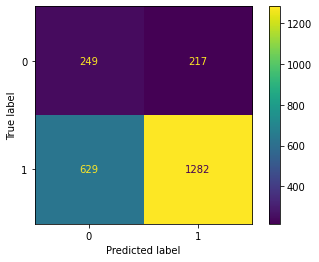

time: 185 ms (started: 2021-11-18 14:00:30 +00:00)


In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_preds)
conf_mat_plot = ConfusionMatrixDisplay(conf_mat)

display(conf_mat)
conf_mat_plot.plot()

In [199]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.28      0.53      0.37       466
           1       0.86      0.67      0.75      1911

    accuracy                           0.64      2377
   macro avg       0.57      0.60      0.56      2377
weighted avg       0.74      0.64      0.68      2377

time: 16.9 ms (started: 2021-11-18 14:00:34 +00:00)


In [200]:
tn, fp, fn, tp = conf_mat.ravel()
recall = (tp)/(tp+fn)
prec = (tp)/(tp+fp)
f1 = f1_score(y_test, y_preds, average='micro')

print('accuracy metrics using the new model')
print(' f1:', f1, '\n','recall', recall, '\n', 'precision:', prec)

accuracy metrics using the new model
 f1: 0.6440891880521666 
 recall 0.6708529565672423 
 precision: 0.8552368245496998
time: 7.41 ms (started: 2021-11-18 14:00:46 +00:00)


One observation that I got from playing around with the numbers (because I was not satisfied with the results of RandomizedSearchCV) was that the recall metric was being compromised - as I increased the number of neurons in the hidden_layer_sizes parameter, the predictions started to predict all in the positive class. Perhaps there is more than meets the eye when it comes to tuning the hyperparameters of neural networks. Moreover, it may not be a good idea to focus only on one accuracy metric. Initially I looked at only `precision` but noticed that recall was suffering as I changed the parameters in the model. Hence the F1 score may be a better metric to look at to see the impact to both precision and recall.

The precision of this model is 85% but the f1 score is 64%. Let us further explore if cross validation on the model with hypertuned parameters can improve the precision.

## Using OneSidedSelection as resampling technique

In [216]:
sampling_technique = OneSidedSelection(random_state=seed)
X_train, y_train = sampling_technique.fit_resample(X_train, y_train)

time: 1.84 s (started: 2021-11-18 14:03:41 +00:00)


In [217]:
# new_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(100,),
#                           learning_rate='adaptive', alpha=0.001)
new_model = MLPClassifier(activation='tanh',hidden_layer_sizes=(300,),
                          learning_rate='adaptive', alpha=0.001)
another_model.fit(X_train, y_train)

y_preds2 = another_model.predict(X_test)


time: 6.33 s (started: 2021-11-18 14:03:44 +00:00)


array([[  58,  408],
       [  64, 1847]])

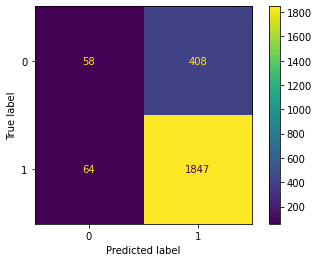

time: 216 ms (started: 2021-11-18 14:03:52 +00:00)


In [218]:
conf_mat2 = confusion_matrix(y_test, y_preds2)
conf_mat_plot2 = ConfusionMatrixDisplay(conf_mat2)

display(conf_mat2)
conf_mat_plot2.plot()

In [219]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       0.48      0.12      0.20       466
           1       0.82      0.97      0.89      1911

    accuracy                           0.80      2377
   macro avg       0.65      0.55      0.54      2377
weighted avg       0.75      0.80      0.75      2377

time: 15.4 ms (started: 2021-11-18 14:03:57 +00:00)


In [208]:
tn, fp, fn, tp = conf_mat2.ravel()
recall2 = (tp)/(tp+fn)
prec2 = (tp)/(tp+fp)
f12 = f1_score(y_test, y_preds2, average='micro')

print('accuracy metrics using the new model')
print(' f1:', f12, '\n','recall', recall2, '\n', 'precision:', prec2)

accuracy metrics using the new model
 f1: 0.8031131678586455 
 recall 0.9727891156462585 
 precision: 0.8171428571428572
time: 12.6 ms (started: 2021-11-18 14:01:56 +00:00)


I also checked the performance of the model using OneSidedSelection, an undersampling technique. The precision is lower than SMOTE but the F1 score is higher.

# SKF, SMOTE and OSS, Hypertuned
Let us see what is the performance of the model (using precision) if we use the hypertuned parameters with cross validation and resampling using SMOTE and OneSidedSelection.

In [236]:
#make trainval and holdout split
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

### Generate Holdout Sets
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X_small, y_small, 
                                           random_state=seed, test_size=0.20, 
                                           stratify=y_small)

time: 18.1 ms (started: 2021-11-18 14:14:06 +00:00)


In [237]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_trainval)
X_test = scaler.transform(X_holdout)
y_train = y_trainval
y_test = y_holdout

time: 19.2 ms (started: 2021-11-18 14:14:08 +00:00)


In [238]:
import time
import warnings 
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier

# initialize models with default hyperparamters
seed = seed

models_dict2 = {
    'Neural Network - MLP Classifier': MLPClassifier(solver = 'adam',
                                                     random_state = seed,
                                                     max_iter = 1000,
                                                     activation='tanh',
                                                     hidden_layer_sizes=(300,))
}

resampling_dict2 = {
    'SMOTE' : SMOTE(random_state = seed),
    'OneSidedSelection' : OneSidedSelection(random_state = seed)
}


time: 9.56 ms (started: 2021-11-18 14:14:11 +00:00)


In [239]:
# lets look at f1 scores
skf = StratifiedKFold(5)
results = {}
for model_name, model in tqdm(models_dict2.items(),
                              desc = '\n##########\nIterating over Modelling Techniques',):
    scores = {}
    for sampling_name, sampling_technique in tqdm(resampling_dict2.items(),
                                                  desc = 'Iterating over Sampling Techniques',
                                                  position=0, leave=True):
        recalls = []
        precisions = []
        f1s = []
        for train_ind, test_ind in skf.split(X_trainval, y_trainval):
            
            X_train, y_train = X_trainval.iloc[train_ind], y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval.iloc[val_ind], y_trainval.iloc[val_ind]

            if sampling_technique is not None:
                X_train, y_train = sampling_technique.fit_resample(X_train, y_train)
            
            model = clone(model)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            # cmat = confusion_matrix(y_val,y_pred)
            # tn, fp, fn, tp = cmat.ravel()
            # prec = (tp)/(tp+fp)
            # recall = (tp)/(tp+fn)
            f1_score(y_val, y_pred, average='micro')
            
            # precisions.append(prec)
            f1s.append(f1)
            
        scores.update({sampling_name : np.mean(f1s)})
    results[model_name] = scores




##########
Iterating over Sampling Techniques: 100%|██████████| 2/2 [00:52<00:00, 26.19s/it]

##########
Iterating over Modelling Techniques: 100%|██████████| 1/1 [00:52<00:00, 52.38s/it]
##########
Iterating over Modelling Techniques: 100%|██████████| 1/1 [00:52<00:00, 52.39s/it]

time: 52.4 s (started: 2021-11-18 14:14:16 +00:00)


In [240]:
f1s_scores = pd.DataFrame.from_dict(results)
print("F1 Score")
display(f1s_scores)

F1 Score


,Neural Network - MLP Classifier
OneSidedSelection,0.644089
SMOTE,0.644089


time: 16.4 ms (started: 2021-11-18 14:16:31 +00:00)


In [241]:
# lts go back to precision scores
skf = StratifiedKFold(5)
results = {}
for model_name, model in tqdm(models_dict2.items(),
                              desc = '\n##########\nIterating over Modelling Techniques',):
    scores = {}
    for sampling_name, sampling_technique in tqdm(resampling_dict2.items(),
                                                  desc = 'Iterating over Sampling Techniques',
                                                  position=0, leave=True):
        recalls = []
        precisions = []
        f1s = []
        for train_ind, test_ind in skf.split(X_trainval, y_trainval):
            
            X_train, y_train = X_trainval.iloc[train_ind], y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval.iloc[val_ind], y_trainval.iloc[val_ind]

            if sampling_technique is not None:
                X_train, y_train = sampling_technique.fit_resample(X_train, y_train)
            
            final_model = clone(model)
            final_model.fit(X_train, y_train)

            y_pred = final_model.predict(X_val)
            # cmat = confusion_matrix(y_val,y_pred)
            # tn, fp, fn, tp = cmat.ravel()
            # prec = (tp)/(tp+fp)
            # recall = (tp)/(tp+fn)
            # f1_score(y_val, y_pred, average='micro')
            
            precisions.append(precision_score(y_val, y_pred))
            # f1s.append(f1)
            
        scores.update({sampling_name : np.mean(precisions)})
    results[model_name] = scores



##########
Iterating over Sampling Techniques: 100%|██████████| 2/2 [00:51<00:00, 25.97s/it]

##########
Iterating over Modelling Techniques: 100%|██████████| 1/1 [00:51<00:00, 51.94s/it]
##########
Iterating over Modelling Techniques: 100%|██████████| 1/1 [00:51<00:00, 51.94s/it]

time: 52 s (started: 2021-11-18 14:16:35 +00:00)


In [242]:
precisions = pd.DataFrame.from_dict(results)
print("Precision Score")
display(precisions)

Precision Score


,Neural Network - MLP Classifier
OneSidedSelection,0.804789
SMOTE,0.848782


time: 21.6 ms (started: 2021-11-18 14:17:27 +00:00)


There was marginal improvement (from 84.0 to 84.87) by doing resampling and cross validation n the hypertuned model. 

# The final model
The results of both precision and accuracy shows that we achieved the highest precision using the base model (without tuning) and using SMOTE for resampling. Hence, this is the final model that we will use.

In [291]:
# Generate Holdout Sets
(X_trainval, X_holdout, y_trainval, y_holdout) = train_test_split(X_small, y_small, 
                                           random_state=seed, test_size=0.20, 
                                           stratify=y_small)
# scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_trainval)
X_test = scaler.transform(X_holdout)
y_train = y_trainval
y_test = y_holdout

# basic model
models_dict2 = {
    'Neural Network - MLP Classifier': MLPClassifier(solver = 'adam',
                                                     random_state = seed,
                                                     max_iter = 1000,)
}

# smote only
resampling_dict2 = {
    'SMOTE' : SMOTE(random_state = seed),
}

# precision
skf = StratifiedKFold(5)
results = {}
for model_name, model in tqdm(models_dict2.items(),
                              desc = '\n##########\nIterating over Modelling Techniques',):
    scores = {}
    for sampling_name, sampling_technique in tqdm(resampling_dict2.items(),
                                                  desc = 'Iterating over Sampling Techniques',
                                                  position=0, leave=True):
        recalls = []
        precisions = []
        f1s = []
        for train_ind, test_ind in skf.split(X_trainval, y_trainval):
            
            X_train, y_train = X_trainval.iloc[train_ind], y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval.iloc[val_ind], y_trainval.iloc[val_ind]

            if sampling_technique is not None:
                X_train, y_train = sampling_technique.fit_resample(X_train, y_train)
            
            best_model = clone(model)
            best_model.fit(X_train, y_train)

            y_pred = best_model.predict(X_val)
            # cmat = confusion_matrix(y_val,y_pred)
            # tn, fp, fn, tp = cmat.ravel()
            # prec = (tp)/(tp+fp)
            # recall = (tp)/(tp+fn)
            
            
            recalls.append(recall_score(y_val, y_pred))
            precisions.append(precision_score(y_val, y_pred))
            f1s.append(f1_score(y_val, y_pred, average='micro'))

print("\n", "Accuracies of the final model")          
print("avg precision:", np.mean(precisions))
print("avg recall:", np.mean(recalls))
print("avg F1 score:", np.mean(f1s))
# display(cmat)


##########
Iterating over Sampling Techniques: 100%|██████████| 1/1 [00:21<00:00, 21.57s/it]

##########
Iterating over Modelling Techniques: 100%|██████████| 1/1 [00:21<00:00, 21.58s/it]
##########
Iterating over Modelling Techniques: 100%|██████████| 1/1 [00:21<00:00, 21.58s/it]


 Accuracies of the final model
avg precision: 0.8719659933552937
avg recall: 0.37329842931937174
avg F1 score: 0.43463157894736837
time: 21.7 s (started: 2021-11-18 15:33:37 +00:00)


# Explaining the model

In [283]:
feature_names 
feat_list = list(feature_names)
# feat_list

time: 1.32 ms (started: 2021-11-18 15:31:13 +00:00)


## Permutation Importance

In [284]:
import eli5
from eli5.sklearn import PermutationImportance
  
# create permutation importance object using final model (OneSidedSelection)
# and fit on test set
perm = PermutationImportance(best_model, random_state=seed).fit(X_test, y_test)
  
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = feat_list)

Weight,Feature
0.0012 ± 0.0003,purpose_home_improvement
0.0010 ± 0.0013,purpose_debt_consolidation
0.0004 ± 0.0000,B3
0.0004 ± 0.0000,purpose_other
0.0004 ± 0.0000,A5
0.0004 ± 0.0000,purpose_vacation
0.0004 ± 0.0000,purpose_house
0.0003 ± 0.0003,A2
0.0003 ± 0.0003,initial_list_status_w
0.0003 ± 0.0003,purpose_major_purchase


time: 1.68 s (started: 2021-11-18 15:31:17 +00:00)


In [285]:
# create permutation importance object using final model (OneSidedSelection)
# and fit on test set
perm = PermutationImportance(best_model, random_state=seed).fit(X_train, y_train)
  
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = feat_list)

Weight,Feature
0.0144 ± 0.0032,loan_amnt
0.0082 ± 0.0064,annual_inc
0.0040 ± 0.0014,revol_bal
0.0010 ± 0.0005,dti
0.0007 ± 0.0002,term
0.0006 ± 0.0004,int_rate
0.0003 ± 0.0002,verification_status_Verified
0.0003 ± 0.0002,mort_acc
0.0003 ± 0.0002,initial_list_status_w
0.0002 ± 0.0001,C2


time: 8.2 s (started: 2021-11-18 15:31:20 +00:00)


The first question is should we compute importance on training or test data. This should be done on test data because feature importance based on training data may make us believe that these features are important, but the model may just have overfitted the data. (https://christophm.github.io/interpretable-ml-book/feature-importance.html). Hence, the feature importance of interest are those that ar related to purpose (debt consolidation, home improvement, vacation, major purchase), credit ratings (A2, A5, B3 and B4).

According to our class slides, the first number in each row indicates how much model performance decreased with random shuffling, using the same performance metric as the model

The number after the ± measures how performance varied from one-reshuffling to the next, i.e., degree of randomness across multiple shuffles.


# The Model "Deployed"

Given a random customer below, will we offer him/her a loan?

In [297]:
# we will get a random person from the dataset

import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                   24000.00
term                           60.00
int_rate                       13.11
installment                   547.43
annual_inc                  85000.00
                              ...   
purpose_other                   0.00
purpose_renewable_energy        0.00
purpose_small_business          0.00
purpose_vacation                0.00
purpose_wedding                 0.00
Name: 304691, Length: 67, dtype: float64

time: 68.7 ms (started: 2021-11-18 15:47:47 +00:00)


In [304]:
cust_df = pd.DataFrame(df.iloc[304691]).T
cust_df

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,OTHER,OWN,RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
304691,24000.0,60.0,13.11,547.43,85000.0,10.98,1991.0,6.0,0.0,35464.0,29.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 129 ms (started: 2021-11-18 15:57:30 +00:00)


In [298]:
newcust_class = best_model.predict(new_customer.values.reshape(1,67))
newcust_class[0]

1

time: 8.14 ms (started: 2021-11-18 15:47:50 +00:00)


In [299]:
# did he/she actually pay the loan? the model predicted '0' (defaulted)
df.iloc[random_ind]['loan_repaid']

1.0

time: 5.88 ms (started: 2021-11-18 15:47:53 +00:00)


Our model has performed quite well by predicting that the new customer will pay back their loan.

# Next level play: Using Keras
Although use of keras and tensorflow was not allowed to be discussed for this project, I was also curious on how neural networks can be implemented using tensorflow/keras. (Note: this section was not discussed during the presentation, but I am adding this here because this was part of my 'exploration')

In [271]:
# first import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
import numpy as np
import pandas as pd

time: 2.43 ms (started: 2021-11-18 14:24:13 +00:00)


Since there are 67 features in my data set, i will start with 67 layers. The number of nodes in the layers decreases by half.

In [272]:

nn_keras = Sequential()

nn_keras.add(Dense(67, activation='tanh'))

nn_keras.add(Dense(33, activation='tanh'))

nn_keras.add(Dense(16, activation='tanh'))

nn_keras.add(Dense(units=1, activation='sigmoid'))

nn_keras.compile(loss='binary_crossentropy', optimizer='adam')

time: 19.4 ms (started: 2021-11-18 14:24:13 +00:00)


In [273]:
startTime_keras = time.time()

nn_keras.fit(x=X_train, y=y_train, epochs = 25, batch_size=256,
          validation_data=(X_test,y_test))

elapsed_time_keras = time.time() - startTime_keras


Epoch 1/25
28/28 [==============================] - 1s 9ms/step - loss: 0.6563 - val_loss: 0.7162
Epoch 2/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5223 - val_loss: 0.7308
Epoch 3/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5140 - val_loss: 0.7462
Epoch 4/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5086 - val_loss: 0.7572
Epoch 5/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5067 - val_loss: 0.7586
Epoch 6/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5034 - val_loss: 0.7488
Epoch 7/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5039 - val_loss: 0.7493
Epoch 8/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5061 - val_loss: 0.7451
Epoch 9/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5068 - val_loss: 0.7493
Epoch 10/25
28/28 [==============================] - 0s 4ms/step - loss: 0.5055 - val_loss: 0.7468
Epoch 11/25
28/28 [

In [274]:
from tensorflow.keras.models import load_model

nn_keras.save('ml2proj_nodropout.h5')

time: 25 ms (started: 2021-11-18 14:24:19 +00:00)


In [275]:
score = nn_keras.evaluate(X_test, y_test)
print(score)

75/75 [==============================] - 0s 1ms/step - loss: 0.7783
0.7782555818557739
time: 196 ms (started: 2021-11-18 14:24:19 +00:00)


In [276]:
y_pred = nn_keras.predict(X_test)
y_pred = pd.DataFrame(y_pred)

y_pred.describe()

,0
count,2377.000000
mean,0.444014
std,0.099397
min,0.216690
25%,0.371367
50%,0.437705
75%,0.511986
max,0.744749


time: 194 ms (started: 2021-11-18 14:24:19 +00:00)


In [277]:
threshold = 0.50

class_preds = np.where(y_pred > threshold, 1,0)

time: 1.65 ms (started: 2021-11-18 14:24:20 +00:00)


array([[ 353,  113],
       [1354,  557]])

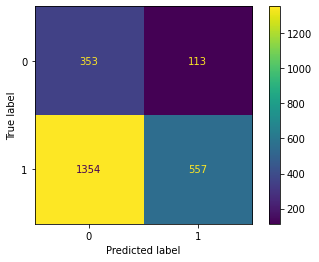

time: 205 ms (started: 2021-11-18 14:24:20 +00:00)


In [278]:
# this is the sklearn way
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, class_preds)
conf_mat_plot = ConfusionMatrixDisplay(conf_mat)

display(conf_mat)
conf_mat_plot.plot()

In [279]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print(classification_report(y_test, class_preds))


              precision    recall  f1-score   support

           0       0.21      0.76      0.32       466
           1       0.83      0.29      0.43      1911

    accuracy                           0.38      2377
   macro avg       0.52      0.52      0.38      2377
weighted avg       0.71      0.38      0.41      2377

time: 17.5 ms (started: 2021-11-18 14:24:20 +00:00)


In [280]:
tn, fp, fn, tp = conf_mat.ravel()
recall = (tp)/(tp+fn)
prec = (tp)/(tp+fp)
f1 = f1_score(y_test, class_preds, average='micro')

print(' f1:', f1, '\n','recall', recall, '\n', 'precision:', prec)

 f1: 0.38283550694152285 
 recall 0.2914704343275772 
 precision: 0.8313432835820895
time: 9.65 ms (started: 2021-11-18 14:24:20 +00:00)


In [281]:
df2.columns

df3 = df2[['Machine Learning Classification Method', 'F1 Score', 'Recall',
           'Precision', 'Training Time']]
df3.loc[5]= ['Neural Network - Keras', f1, recall, prec, elapsed_time_keras]

df3

,Machine Learning Classification Method,F1 Score,Recall,Precision,Training Time
1,Logistic Regression,0.803955,0.991627,0.808102,0.348869
2,Random Forest Classifier,0.803955,0.979069,0.814541,1.833384
3,Gradient Boosting Classifier,0.802692,0.978022,0.814024,2.908243
4,NN - MLP Classifier,0.792175,0.950288,0.819865,18.911177
5,Neural Network - Keras,0.382836,0.291470,0.831343,5.764896


time: 30.7 ms (started: 2021-11-18 14:24:20 +00:00)


It seems that there was no marked improvement in the keras model if I compare it to the untuned ML results. There may be other parameters that we can explore in keras such as dropout, and how to set up the architecture of the neural network - i.e., how do we select the number of layers and the number of nodes in each layer. One takeaway though is that it is noticeable that keras' implementation is faster compared to sklearn's MLPClassifier.

It may be noted that the confusion matrix and recall and precision metrics are not that good yet, but comparable to the other base (non-tuned) models. There is definitely room to tune the parameters and also explore how to improve the architecture of neural networks.

## Conclusions

The following are the conclusions for this study. 

1. While limited, the MLPClassifier is a viable alternative to implement neural networks. The accuracy of the MLPClassifier can be improved by hypertuning the parameters.

2. The model using stratified cross validation and SMOTE had the highest accuracy. This may be because the hypertuning of the MLPClassifier using RandomizedSearchCV was not able to look at all possible combinations of the parameters that would lead for performance to be improved.

3. Imbalaned datasets are a challenge to deal with because of the extra complexity of having a resmapling method. The resampling method chosen was SMOTE because this gave the highest precision, but if evaluated using the highest F1 score, OneSidedSelection is the resampling method of choice. However, for this study, precision was the ultimate metric because this is the metric that has the most translatable business value (i.e. minimize classifying defaulters as paid. 

Finally, please note that results and discussions are dispersed throughout this study as every model result has a small discussion.

# Recommendations for further study

There are still some improvements that can be done in this study. 

1. Compare the performance of the MLPClassifier with the plain vanilla neural network using numpy or keras/tensorflow. Also, how do we select the proper architecture of a neural network?

2. Explore the other resampling techniques that can be used that may give a higher accuracy

3. Explore the other explainability methods such as counterfactuals. Unfortunately, while I wanted to use SHAP, the kernel for KernelExplainer keeps on dying so I settled with permutation importance instead. Using keras/tensorflow may give me access to the DeepExplainer of SHAP.

4. Improve the pipeline further by doing the gridsearch, resampling and cross validation in one step/one loop.

5. Add even more data to see if there will be a big improvement in the model.

6. Explore the dynamics of precision and accuracy in more detail, and the trade-offs that this pose as we tune the neural network model.

# References:

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

https://towardsdatascience.com/nothing-but-numpy-understanding-creating-binary-classification-neural-networks-with-e746423c8d5c

https://androidkt.com/get-class-labels-from-predict-method-in-keras/

https://towardsdatascience.com/interpreting-your-deep-learning-model-by-shap-e69be2b47893

https://www.yourdatateacher.com/2021/05/17/how-to-explain-neural-networks-using-shap/

https://towardsdatascience.com/machine-learning-predicting-bank-loan-defaults-d48bffb9aee2

https://www.dataschool.io/roc-curves-and-auc-explained/

https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

https://github.com/SkalskiP/ILearnDeepLearning.py/blob/master/01_mysteries_of_neural_networks/03_numpy_neural_net/Numpy%20deep%20neural%20network.ipynb

https://www.researchgate.net/post/K-fold-cross-validation-is-decreasing-my-accuracy

Jose Portilla Complete Tensorflow 2 and Keras Deep Learning Bootcamp (Udemy), including sample codes